# Chrono Trigger
Running some tests with the data found [here](https://docs.google.com/spreadsheets/d/19X5OfcvansoOZrAgIwW3BYhITnEAXFITMG14KkopWnU/edit#gid=1156088696)

# Importing data

Creating a simple `Character` class that takes care of reading the data, storing it and saving the character name, to make plotting easier.

In [181]:
import numpy as np
import pandas as pd


class Character(object):
    def __init__(self, csv_path):
        self.name = csv_path.split('/')[-1].split('.')[0]
        self.data = pd.read_csv(csv_path)

    def get_data(self):
        return self.data

    def get_name(self):
        return self.name

crono = Character("./data/Crono.csv")
ayla = Character("./data/Ayla.csv")
frog  = Character("./data/Frog.csv")
lucca = Character("./data/Lucca.csv")
marle = Character("./data/Marle.csv")
magus = Character("./data/Magus.csv")
robo = Character("./data/Robo.csv")
weapons = pd.read_csv("./data/Weapons.csv")
helmets = pd.read_csv("./data/Helmets.csv")
armors = pd.read_csv("./data/Armors.csv")
accessories = pd.read_csv("./data/Accessories.csv")

all_characters = [crono, lucca, frog, marle, robo, ayla, magus]

print(crono.name)
print(crono.data)

Crono
    Level   HP  MP  Evasion  Hit  Magic  Magic Defense  Power  Stamina
0       1   70   8        8    8      5              2      5        8
1       2   83  10        8    8      5              3      6        9
2       3   96  12        8    8      5              5      7       11
3       4  109  14        9    8      6              6      9       12
4       5  122  16        9    9      6              8     10       14
..    ...  ...  ..      ...  ...    ...            ...    ...      ...
94     95  999  99       43   36     44             99     99       99
95     96  999  99       44   36     44             99     99       99
96     97  999  99       44   36     45             99     99       99
97     98  999  99       44   37     45             99     99       99
98     99  999  99       45   37     46             99     99       99

[99 rows x 9 columns]


# Comparing Stats
Methods for comparing character stats among themselves.

In [182]:
import matplotlib
import seaborn as sns
class Comparison(object):
    @staticmethod
    def __get_stat(char, stat):
        char_data = char.get_data()
        return char_data[stat]

    @staticmethod
    def __get_capped_stat(char, stat, max_value):
        # Getting the HP until it hits the max value once, then we don't need to get it anymore
        s = Comparison.__get_stat(char, stat)
        unique = []
        hit_top = False
        for i in s:
            if not hit_top:
                unique.append(i)
                if i >= max_value:
                    hit_top = True
        return unique

    @staticmethod
    def get_capped_data(stat, max_value):
        max_size = 0
        for c in all_characters:
            s = Comparison.__get_capped_stat(c, stat, max_value)
            if len(s) > max_size:
                max_size = len(s)
        values = {}
        for c in all_characters:
            s = Comparison.__get_capped_stat(c, stat, max_value)
            while len(s) < max_size:
                s.append(999)
            values[c.get_name()] = s
        return pd.DataFrame(data=values)

    @staticmethod
    def get_stat_data(stat):
        values = {}
        for c in all_characters:
            stat_values = Comparison.__get_stat(c, stat)
            values[c.get_name()] = stat_values
        return pd.DataFrame(data=values)

class LinePlotter(object):
    @staticmethod
    def set_size(width, height):
        matplotlib.rcParams['figure.figsize'] = [width, height]

    @staticmethod
    def plot_line(data):
        sns.set_style("darkgrid")
        sns.lineplot(data=data, linewidth=2.5)

### HP

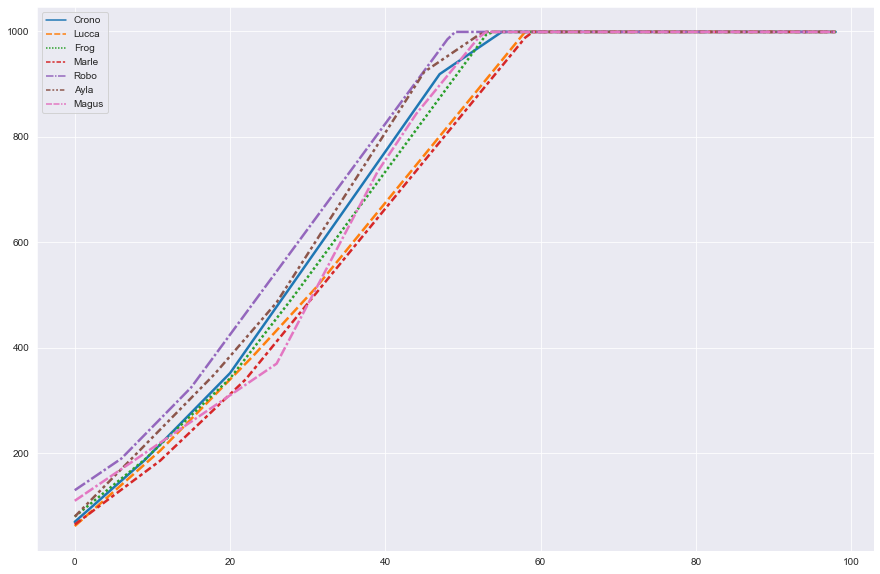

In [183]:
LinePlotter.set_size(15, 10)
LinePlotter.plot_line(Comparison.get_stat_data("HP"))

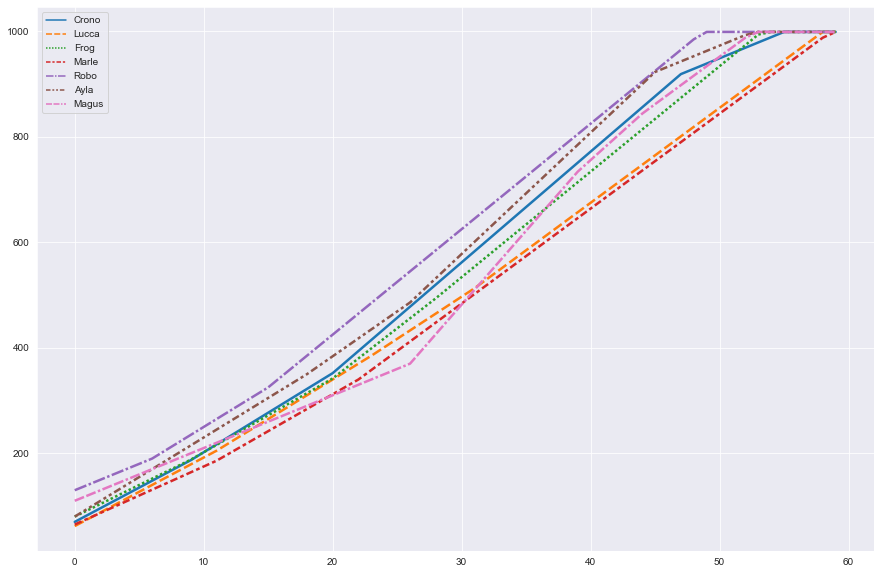

In [184]:
LinePlotter.plot_line(Comparison.get_capped_data("HP", 999))

### MP

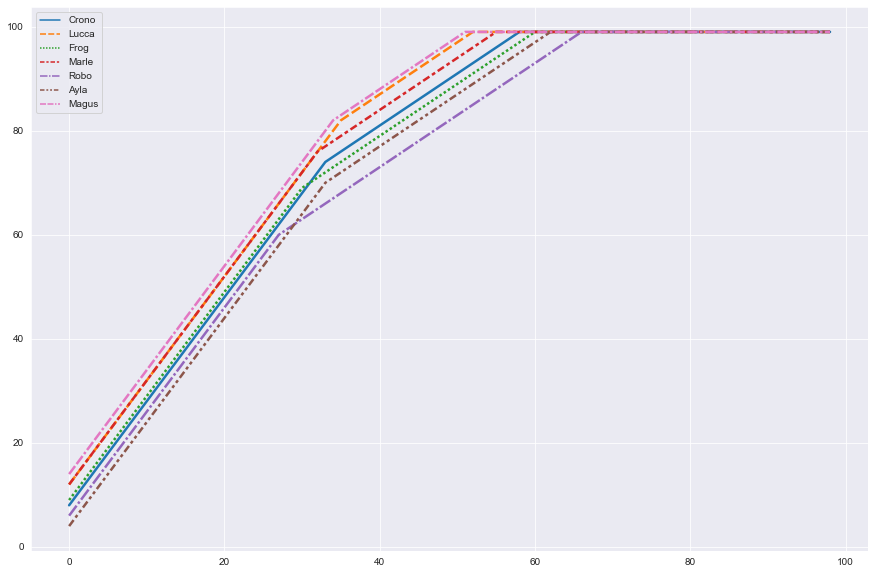

In [185]:
LinePlotter.plot_line(Comparison.get_stat_data("MP"))

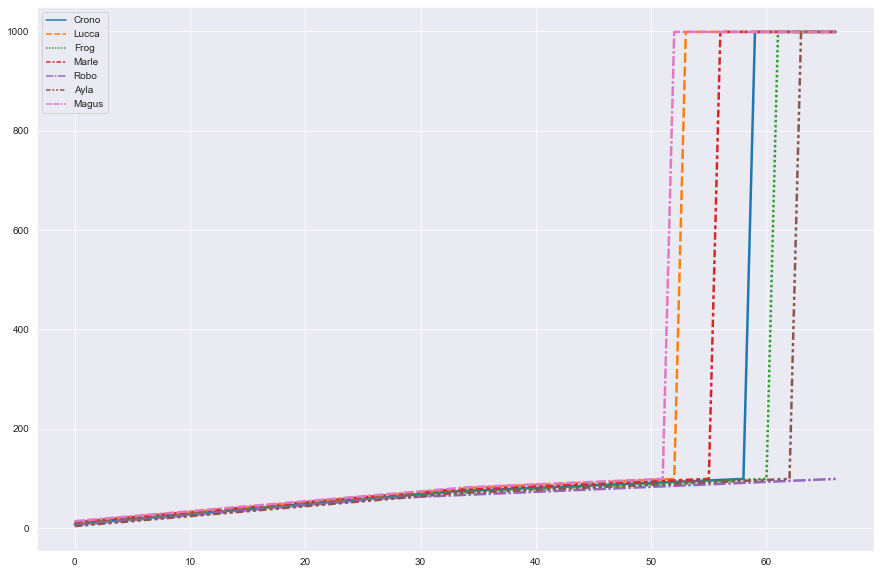

In [186]:
LinePlotter.plot_line(Comparison.get_capped_data("MP", 99))